# Importing Library

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.float_format', str)


# Loading DataSet

In [3]:
customer = pd.read_csv('customer.csv')
products = pd.read_csv("products.csv")
sales = pd.read_csv("sales.csv")

# Exploratory Data Analysis for three Daataset
1. Data analysis for each data set individualy 
2. Data analysis for all three dataset togther
3. WE have month column so analyzing time series analysis 

## Customers

In [4]:
customer.head()

,customer_id,size,type
0,1210469940,MICRO,HOME SALES
1,1277939294,NaN,CORNER SHOP
2,1006989421,MEDIUM,GROCERIES
3,1618314377,NaN,HOME SALES
4,707369850,NaN,HOME SALES


In [5]:
customer.isna().sum()

customer_id      0
size           355
type             0
dtype: int64

In [6]:
customer.shape

(1422, 3)

In [7]:
customer.customer_id.nunique()

1422

In [8]:
customer[customer['size'].isna()].type.value_counts()

HOME SALES                   167
CORNER SHOP                   69
GROCERIES                     48
WINE AND SPIRIT               22
BAR                           16
FAMILY-RUN SUPERMAKRET        11
FRESH VEGTABLE MARKET         10
PHARMACY                       6
BUTCHERY                       3
FAMILY-OWNED RESTAURANT        1
SPECIALIZED FOOD SERVICES      1
CONVENIENCE STORE              1
Name: type, dtype: int64

In [9]:
customer.dtypes

customer_id     int64
size           object
type           object
dtype: object

In [10]:
# Type is not speific to and size 
customer.groupby(by=['size', 'type']).count()

customer_id
size        type                                  
EXTRA LARGE BAR                                  1
            FAMILY-RUN SUPERMAKRET               6
            FRESH VEGTABLE MARKET                1
            GROCERIES                           14
            WHOLESELLER                          6
            WINE AND SPIRIT                      5
LARGE       CORNER SHOP                          7
            FAMILY-RUN SUPERMAKRET               6
            FRESH VEGTABLE MARKET                1
            GROCERIES                           35
            SPECIALIZED FOOD SERVICES            1
            WHOLESELLER                          7
            WINE AND SPIRIT                      6
MEDIUM      BAR                                 17
            BUTCHERY                             1
            CORNER SHOP                        102
            FAMILY-OWNED RESTAURANT              2
            FAMILY-RUN SUPERMAKRET              10
            FRESH VEGTABLE MARKET               23
            GROCERIES                          165
            HOME SALES                          54
            PHARMACY                             4
            SPECIALIZED FOOD SERVICES            3
            WHOLESELLER                          9
            WINE AND SPIRIT                     13
MICRO       BAR                                 11
            BUTCHERY                             6
            CORNER SHOP                         14
            FAMILY-OWNED RESTAURANT              2
            FAMILY-RUN SUPERMAKRET               2
            FRESH VEGTABLE MARKET                3
            GROCERIES                           16
            HOME SALES                         124
            PHARMACY                            10
            WHOLESELLER                          1
            WINE AND SPIRIT                      2
SMALL       BAR                                 40
            BUTCHERY                             2
            CORNER SHOP                         67
            FAMILY-RUN SUPERMAKRET               1
            FRESH VEGTABLE MARKET               10
            GROCERIES                           52
            HOME SALES                         183
            PHARMACY                             5
            SPECIALIZED FOOD SERVICES            4
            WHOLESELLER                          1
            WINE AND SPIRIT                     12

## Product

In [11]:
products.head()

,material_id,category
0,3008,ProductA
1,3041,ProductA
2,4548,ProductA
3,19894,ProductA
4,2549,ProductB


In [12]:
products.isna().sum()

material_id    0
category       0
dtype: int64

In [13]:
products.category.unique(), products.shape

(array(['ProductA', 'ProductB', 'ProductC', 'ProductD', 'ProductE'],
       dtype=object),
 (67, 2))

In [14]:
products.groupby(by='category').count()

,material_id
category,
ProductA,4
ProductB,37
ProductC,12
ProductD,8
ProductE,6


## Sales

In [15]:
sales.head()

,customer_id,month,material_id,amount
0,1688321624,202007,2956,19.8125
1,1440773424,202007,2933,7.9256
2,1570938024,202007,5114,7.9256
3,1637860776,202007,4548,175.0093
4,561448224,202007,4548,196.4868


In [16]:
sales.shape

(251300, 4)

In [17]:
sales.isna().sum()

customer_id    0
month          0
material_id    0
amount         0
dtype: int64

In [18]:
# 2 years of data from June 2020 to May 2022 
# Looks equal distribution for every month 
sales.month.value_counts()

202204    12175
202203    12104
202205    12007
202201    11200
202202    11160
202106    11054
202105    11035
202112    11013
202104    10886
202111    10588
202107    10507
202110    10499
202108    10475
202103    10419
202109    10033
202007    10011
202206     9996
202010     9708
202011     9627
202101     9570
202012     9568
202008     9374
202102     9165
202009     9126
Name: month, dtype: int64

## Join all three data set 
### Sales ***LEFT JOIN*** Products  ***LEFT JOIN*** Customers

In [19]:
sales_product = pd.merge(sales,customer, how='left')

In [20]:
sales_product.shape

(251300, 6)

In [21]:
df = pd.merge(sales_product,products, how='left')
df.shape, df.columns

((251300, 7),
 Index(['customer_id', 'month', 'material_id', 'amount', 'size', 'type',
        'category'],
       dtype='object'))

In [22]:
df.head()

,customer_id,month,material_id,amount,size,type,category
0,1688321624,202007,2956,19.8125,MEDIUM,GROCERIES,ProductC
1,1440773424,202007,2933,7.9256,MICRO,CORNER SHOP,ProductB
2,1570938024,202007,5114,7.9256,MICRO,HOME SALES,ProductB
3,1637860776,202007,4548,175.0093,MEDIUM,CORNER SHOP,ProductA
4,561448224,202007,4548,196.4868,MEDIUM,CORNER SHOP,ProductA


In [23]:
# unique Customers
df.customer_id.nunique()

1409

In [24]:
df.isna().sum()

customer_id        0
month              0
material_id        0
amount             0
size           30131
type               0
category           0
dtype: int64

In [25]:
# I can conclude is in terms of Product cost A>B>C>D>E
df.groupby('category').agg({'amount':'mean', 'category':'count'})

,amount,category
category,,
ProductA,105.68472020385367,57296
ProductB,13.548164528447046,106584
ProductC,12.700564244758667,79703
ProductD,10.050851904761904,3360
ProductE,3.194840968556346,4357


In [26]:
# Same conclusion shows here as mean Product cost A>B>C>D>E 
df.groupby(['size', 'category']).agg({'amount':'mean', 'category':'count'})

amount  category
size        category                             
EXTRA LARGE ProductA  375.0390896226415      2014
            ProductB  34.86433053153792      7055
            ProductC 29.814569025270757      5540
            ProductD 14.427881003584229       279
            ProductE   9.03112780748663       374
LARGE       ProductA 138.37176008032128      3735
            ProductB 17.693508730088887     11363
            ProductC 17.370086620590058      9694
            ProductD 12.607988868940755       557
            ProductE 3.2647531690140847       568
MEDIUM      ProductA 107.59739319122698     22706
            ProductB 12.082401534111293     47389
            ProductC 11.568245161716172     37875
            ProductD  8.303984495021338      1406
            ProductE 2.5538019230769233      1976
MICRO       ProductA  59.50444993181375      5133
            ProductB  9.246158636003173      6305
            ProductC  7.335958019003742      3473
            ProductD 16.359904705882354       255
            ProductE 1.4064520446096653       269
SMALL       ProductA  81.60921076147748     16271
            ProductB  9.952077151872304     21551
            ProductC  8.624512001411931     14165
            ProductD  7.554766324435318       487
            ProductE 2.0585582990397806       729

## Time Series Data Analysis as we have month and year for sale transaction 

### Sales Data

In [27]:
sales = pd.read_csv("sales.csv")
sales.head()

,customer_id,month,material_id,amount
0,1688321624,202007,2956,19.8125
1,1440773424,202007,2933,7.9256
2,1570938024,202007,5114,7.9256
3,1637860776,202007,4548,175.0093
4,561448224,202007,4548,196.4868


In [28]:
# No null values thats good 
sales.isna().sum()

customer_id    0
month          0
material_id    0
amount         0
dtype: int64

In [29]:
sales['customer_id'] = sales['customer_id'].astype('str')
sales['material_id'] = sales['material_id'].astype('str')

# Step 2: Convert the 'Date' column to a proper date format
sales['month'] = pd.to_datetime(sales['month'], format='%Y%m')

In [30]:
## Format Date for analysis
sales.dtypes

customer_id            object
month          datetime64[ns]
material_id            object
amount                float64
dtype: object

<AxesSubplot:xlabel='month'>

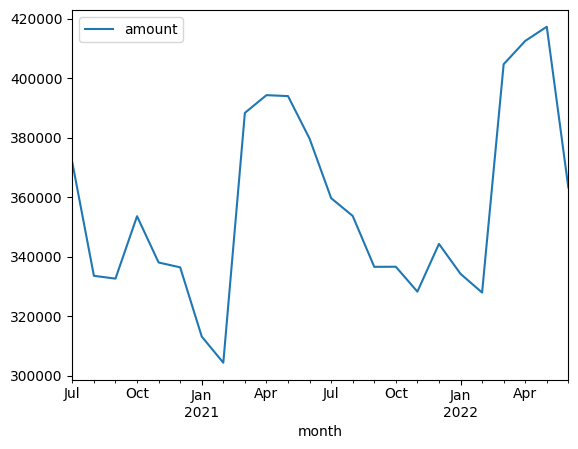

In [31]:
sales.groupby('month').agg({'amount':'sum'})
sales.groupby('month').agg({'amount':'sum'}).plot()

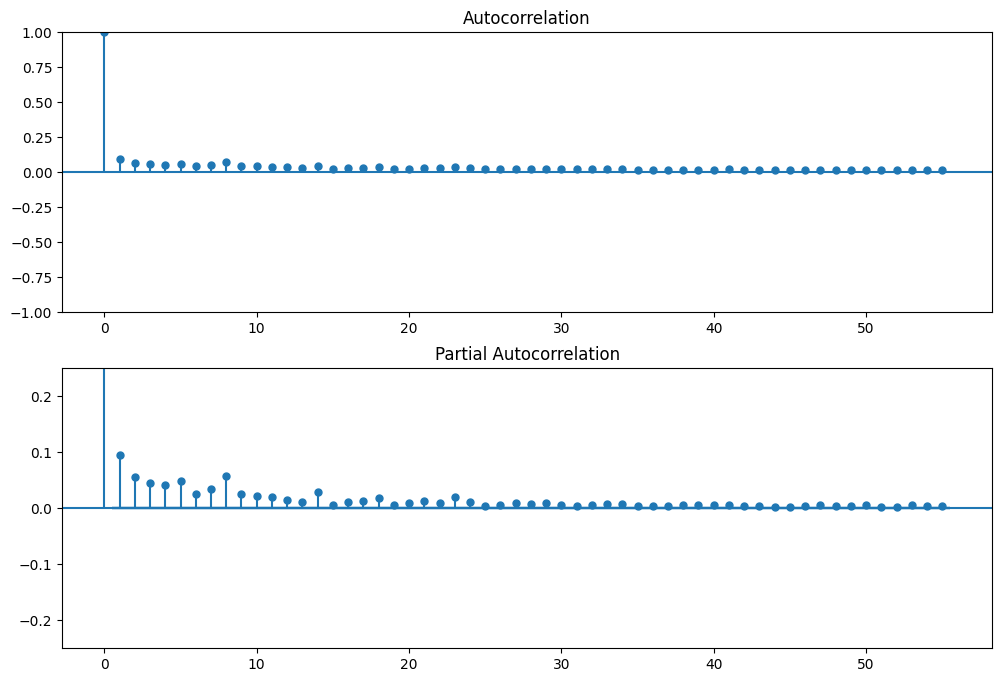

In [32]:
# Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots 
#These plots can help identify the presence of autocorrelation in the data.

# looks like it is in the order of decresing and it says data is staionary, We can run several test like adf fuller. 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(sales['amount'], ax=ax[0])
plot_pacf(sales['amount'], ax=ax[1])

# Adjust the y-axis limits
plt.ylim(-0.25, 0.25)

plt.show()

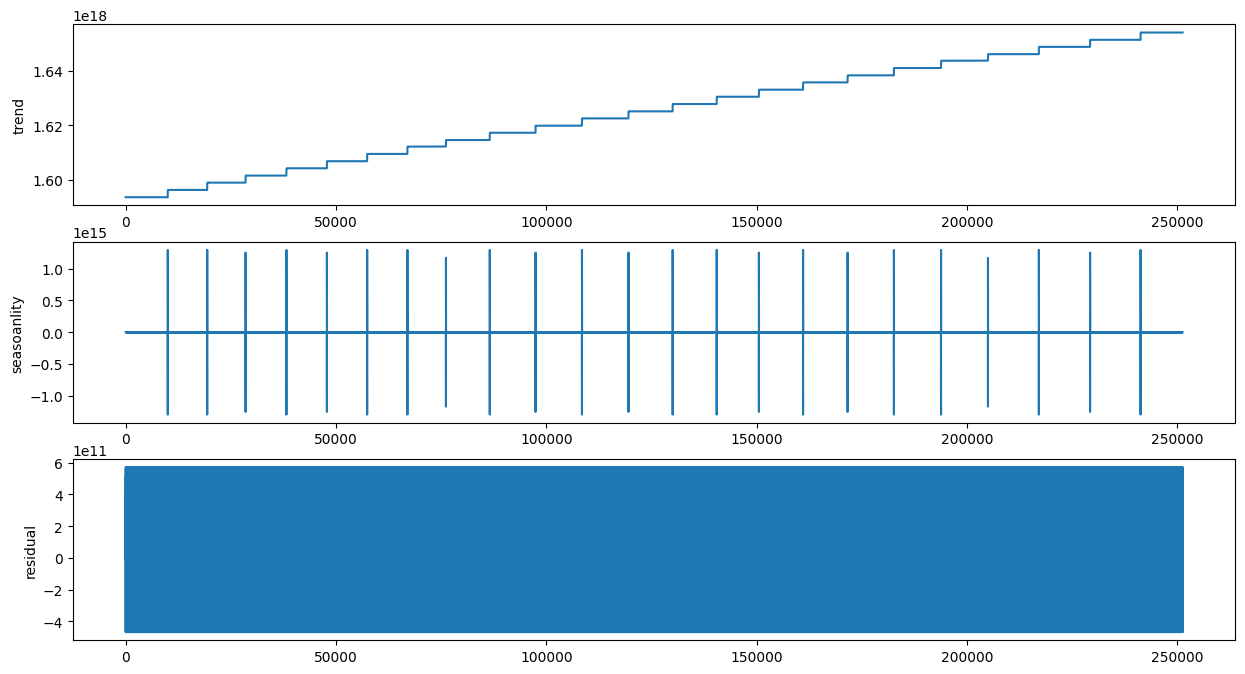

In [33]:
# We can also see that the residual plot shows zero. That is good sign as it able to seperate noise from the dats
# looks like there is no seasonality 

from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(sales[['month']], model = "additive",period = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

In [35]:
# Rolling statistics 
# Looks like mean, std, sum remain constant over the period 
# We can conclude data is stationary 
sales.groupby(['month'], as_index=False).agg({'amount':['sum', 'mean','std']})

month             amount                                      
                             sum               mean                std
0  2020-07-01        371641.0219  37.12326659674358 146.60379521468906
1  2020-08-01        333581.8439  35.58585917431193  127.5198574929515
2  2020-09-01        332637.4519 36.449424928774924 123.88285865224766
3  2020-10-01         353622.203 36.425855274000824 115.90926876917304
4  2020-11-01        338064.6227  35.11630027007375 115.75082137999814
5  2020-12-01        336429.3543  35.16193084239131 110.01388394840903
6  2021-01-01         313162.246   32.7233276907001  97.50136140796654
7  2021-02-01 304357.25920000003  33.20864803055101   98.2757521762298
8  2021-03-01        388368.9949 37.275073893847775 115.37599058997601
9  2021-04-01        394333.3317 36.223895985669664 119.37454590637078
10 2021-05-01        394022.5127  35.70661646579067  110.7052184270641
11 2021-06-01        379725.7391 34.351885208974124 109.01085893033544
12 2021-07-01        359707.5566 34.235039173884076 108.98141819773873
13 2021-08-01        353716.0517  33.76764216706444 104.27597371862133
14 2021-09-01        336601.8016  33.54946691916675 105.96105362983822
15 2021-10-01        336633.1411  32.06335280502905  100.8961633956825
16 2021-11-01        328259.8705 31.003010058556857  88.87652029126593
17 2021-12-01        344315.4864  31.26445894851539  82.87591305161153
18 2022-01-01 334244.81190000003 29.843286776785718  81.39602993090259
19 2022-02-01        327954.5197 29.386605707885305  77.96246071318303
20 2022-03-01        404732.8818  33.43794462987442  93.60937311888259
21 2022-04-01        412571.8274 33.886803071868584  99.26281931084506
22 2022-05-01        417350.2875   34.7589145914883   95.1066535297913
23 2022-06-01        363258.3359  36.34036973789516  97.31365965238102

## Test Dataset

In [36]:
test = pd.read_csv('test.csv')
test.head()

,customer_id,month,category,amount,baseline_prediction
0,670546831,202207,ProductC,92.4612,31.701
1,644085688,202207,ProductA,41.8281,26.418
2,77457054,202207,ProductE,3.5225,0.6859
3,32051085,202207,ProductE,0.8806,0.0
4,1668609463,202207,ProductA,59.44,26.418


In [42]:
test.shape

(3919, 5)

In [43]:
test.isna().sum()

customer_id            0
month                  0
category               0
amount                 0
baseline_prediction    0
dtype: int64

# Modelling
-> Problem Statement
1. we have been given data from June 2020 to June 2022 and WE NEED TO PREDICT THE AMOUNT IN JULY 2022. 
2. We will use time series forcasting model 1. ARIMA, 2. SARIMA, 3. FACEBOOK PROPHET MODEL

-> Stratergy
1. I will create individual timeseries model for combination of (Customer_id,ProductType) and append result to test dataset

-> Assumption about the data
1. there are some customer churn as (set(sales.customer_id) - set(sales.customer_id)) == 423
2. there are some new customers in test dataset as well (set(sales.customer_id) - set(sales.customer_id)) = 9



## Sales Dataset (Prepare the Data)

In [38]:
# Import the data
sales = pd.read_csv("sales.csv")
product = pd.read_csv("products.csv")


# Merge the data to get the product type
sales = pd.merge(sales,product, how='inner')

# Convert the 'Date' column to a proper date format
sales['month'] = pd.to_datetime(sales['month'], format='%Y%m')

#drop the material id
sales.drop(['material_id'], axis=1, inplace=True)

Sales = sales.groupby(by = ['customer_id', 'category', 'month'], as_index=False).agg({'amount':'sum'})

## ARIMA Model and SARIMA Model

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Disable the ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

forecasts = []

# Step 3: Extract unique customers and products
for customer, product in test[['customer_id', 'category']].values:
    
    data = Sales[(Sales['customer_id'] == customer) & (Sales['category'] == product)]
            
    if len(data) <= 2:
        forecasts.append({'customer_id': customer, 'category': product, 'month': 202207, 'Forecast_ARIMA': 0, 'Forecast_SARIMA': 0})
        continue
        
    # Step 3: Set the frequency of the time series explicitly
    data_ts = data.set_index('month')

    # Generate the complete date range from the minimum to maximum date
    date_range = pd.date_range(start=data['month'].min(), end=data['month'].max(), freq='MS')

    # Reindex the data to include missing months in the date range
    data_ts = data_ts.reindex(date_range, fill_value=0)

    # Step 4: Fit the ARIMA model
    model_ARIMA = ARIMA(data_ts['amount'], order=(1, 1, 1))
    model_fit_ARIMA = model_ARIMA.fit(method='statespace', method_kwargs={"warn_convergence": False})
    
    # Step 4: Fit the SARIMA model
    model_fit_SARIMA = SARIMAX(data_ts['amount'], order=(1, 1, 1))
    model_fit_SARIMA = model_fit_SARIMA.fit(disp=False, method_kwargs={"warn_convergence": False})

    # Step 5: Forecast for July 2022
    forecast_value_ARIMA = model_fit_ARIMA.forecast(steps=1)[0]
    
    # Step 5: Forecast for July 2022
    forecast_value_SARIMA = model_fit_SARIMA.forecast(steps=1)[0]
        
    #Step6: Store the forecasted result
    forecasts.append({'customer_id': customer
                      , 'category': product
                      , 'month': 202207
                      , 'Forecast_ARIMA': forecast_value_ARIMA
                      , 'Forecast_SARIMA': forecast_value_SARIMA
                     })

# Step 6: Create a dataframe with the forecasted results
results_df = pd.DataFrame(forecasts)

results_df.head()


,customer_id,category,month,Forecast_ARIMA,Forecast_SARIMA
0,670546831,ProductC,202207,56.24281945430218,56.24281945430218
1,644085688,ProductA,202207,28.300026968879443,28.300026968879443
2,77457054,ProductE,202207,2.9852516543047405,2.9852516543047405
3,32051085,ProductE,202207,0.0,0.0
4,1668609463,ProductA,202207,39.464926151623686,39.464926151623686


In [41]:
results_df.shape

(3919, 5)

## Facebook Prophet Model 

In [47]:
import pandas as pd
import logging
from prophet import Prophet

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Set the logging level for cmdstanpy to only display critical-level messages
logging.getLogger('cmdstanpy').setLevel(logging.CRITICAL)

# Step 3: Extract unique customers and products
forecasts = []

# Step 3: Extract unique customers and products
for customer, product in test[['customer_id', 'category']].values:
    
    data = Sales[(Sales['customer_id'] == customer) & (Sales['category'] == product)]
        
    if len(data) <= 2:
        forecasts.append({'customer_id': customer, 'category': product, 'month': 202207, 'Forecast_Prophet': 0})
        continue

    # Step 2: Convert the 'month' column to a proper date format
    data = data.rename(columns={'month': 'ds', 'amount': 'y'})

    # Step 3: Fit the Prophet model
    model = Prophet()
    model.fit(data)

    # Step 4: Forecast using the Prophet model
    future = model.make_future_dataframe(periods=1, freq='MS')
    forecast = model.predict(future)

    # Step 5: Extract the predicted value for July 2022 (202207)
    forecast_value = forecast.loc[forecast['ds'].dt.year == 2022, 'yhat'].values
    if len(forecast_value) > 0 and not np.isnan(forecast_value[0]):
        forecast_value = forecast_value[0]
    else:
        forecast_value = np.nan
    forecasts.append({'customer_id': customer, 'category': product, 'month': 202207, 'Forecast_Prophet': forecast_value})
        

# Step 6: Create a dataframe with the forecasted results
results_df_Prophet = pd.DataFrame(forecasts)

results_df_Prophet.head()


,customer_id,category,month,Forecast_Prophet
0,670546831,ProductC,202207,163.15731511544655
1,644085688,ProductA,202207,37.560198040415536
2,77457054,ProductE,202207,3.5841567026238295
3,32051085,ProductE,202207,0.0
4,1668609463,ProductA,202207,57.511126286603


In [48]:
results_df_Prophet.shape

(3919, 4)

## Final Result Dataframe

In [58]:
results_df_TAS_pred = pd.merge(test, results_df
                               , how = 'left'
                               , on = ['customer_id', 'category'])

results_df_TASP_pred = pd.merge(results_df_TAS_pred, results_df_Prophet
                                , how = 'left'
                                , on = ['customer_id', 'category'])


final_df = results_df_TASP_pred[['customer_id', 'month_x', 'category', 'amount', 'baseline_prediction'
                                , 'Forecast_ARIMA', 'Forecast_SARIMA', 'Forecast_Prophet']]

final_df = final_df.rename(columns={'month_x': 'month'})

In [59]:
final_df.head()

,customer_id,month,category,amount,baseline_prediction,Forecast_ARIMA,Forecast_SARIMA,Forecast_Prophet
0,670546831,202207,ProductC,92.4612,31.701,56.24281945430218,56.24281945430218,163.15731511544655
1,644085688,202207,ProductA,41.8281,26.418,28.300026968879443,28.300026968879443,37.560198040415536
2,77457054,202207,ProductE,3.5225,0.6859,2.9852516543047405,2.9852516543047405,3.5841567026238295
3,32051085,202207,ProductE,0.8806,0.0,0.0,0.0,0.0
4,1668609463,202207,ProductA,59.44,26.418,39.464926151623686,39.464926151623686,57.511126286603


In [61]:
final_df.isna().sum()

customer_id             0
month                   0
category                0
amount                  0
baseline_prediction     0
Forecast_ARIMA          0
Forecast_SARIMA         0
Forecast_Prophet       36
dtype: int64

In [62]:
final_df.fillna(0, inplace=True)

## Evaluation

In [70]:
## Mean Absolute Error
#  It measures the average absolute difference between the actual and predicted values. 
# Lower values indicate better performance.

from sklearn.metrics import mean_absolute_error

# Calculate MAE for ARIMA
base_mae_arima = mean_absolute_error(final_df['amount'], final_df['baseline_prediction'])

# Calculate MAE for ARIMA
mae_arima = mean_absolute_error(final_df['amount'], final_df['Forecast_ARIMA'])

# Calculate MAE for SARIMA
mae_sarima = mean_absolute_error(final_df['amount'], final_df['Forecast_SARIMA'])

# Calculate MAE for Prophet
mae_prophet = mean_absolute_error(final_df['amount'], final_df['Forecast_Prophet'])

(base_mae_arima, mae_arima, mae_sarima, mae_prophet)

(27.796358127073233,
 30.035367788016806,
 30.035367788016806,
 31.738273385386446)

In [71]:
# Mean Squared Error (MSE)
# It measures the average squared difference between the actual and predicted values. 
#Lower values indicate better performance.

from sklearn.metrics import mean_squared_error

# Calculate MSE for ARIMA
base_mse_arima = mean_squared_error(final_df['amount'], final_df['baseline_prediction'])

# Calculate MSE for ARIMA
mse_arima = mean_squared_error(final_df['amount'], final_df['Forecast_ARIMA'])

# Calculate MSE for SARIMA
mse_sarima = mean_squared_error(final_df['amount'], final_df['Forecast_SARIMA'])

# Calculate MSE for Prophet
mse_prophet = mean_squared_error(final_df['amount'], final_df['Forecast_Prophet'])

(base_mse_arima, mse_arima, mse_sarima, mse_prophet)

(5202.96190497078, 3866.6578459570296, 3866.6578459570296, 4485.82218268211)

In [72]:
# Root Mean Squared Error (RMSE)
# It is the square root of MSE and provides an interpretable metric in the same unit as the target variable.

import numpy as np

# Calculate RMSE for ARIMA
base_rmse_arima = np.sqrt(base_mse_arima)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mse_arima)

# Calculate RMSE for SARIMA
rmse_sarima = np.sqrt(mse_sarima)

# Calculate RMSE for Prophet
rmse_prophet = np.sqrt(mse_prophet)

(base_rmse_arima, rmse_arima, rmse_sarima, rmse_prophet)

(72.13155970149806, 62.18245609460139, 62.18245609460139, 66.97628074685926)

In [74]:
from sklearn.metrics import r2_score

# Calculate R2 for ARIMA
base_r2_arima = r2_score(final_df['amount'], final_df['baseline_prediction'])

# Calculate R2 for ARIMA
r2_arima = r2_score(final_df['amount'], final_df['Forecast_ARIMA'])

# Calculate R2 for SARIMA
r2_sarima = r2_score(final_df['amount'], final_df['Forecast_SARIMA'])

# Calculate R2 for Prophet
r2_prophet = r2_score(final_df['amount'], final_df['Forecast_Prophet'])

(base_r2_arima, r2_arima, r2_sarima, r2_prophet)

(0.903467643511731, 0.9282605561175673, 0.9282605561175673, 0.9167729854666145)

In [75]:
n = len(data)  # Number of samples
p = 1  # Number of predictors (assuming 1 predictor for simplicity)

# Calculate Adjusted R2 for ARIMA
base_adj_r2_arima = 1 - (1 - base_r2_arima) * (n - 1) / (n - p - 1)

# Calculate Adjusted R2 for ARIMA
adj_r2_arima = 1 - (1 - r2_arima) * (n - 1) / (n - p - 1)

# Calculate Adjusted R2 for SARIMA
adj_r2_sarima = 1 - (1 - r2_sarima) * (n - 1) / (n - p - 1)

# Calculate Adjusted R2 for Prophet
adj_r2_prophet = 1 - (1 - r2_prophet) * (n - 1) / (n - p - 1)

(base_adj_r2_arima, adj_r2_arima, adj_r2_sarima, adj_r2_prophet)

(0.9517338217558655,
 0.9641302780587837,
 0.9641302780587837,
 0.9583864927333072)

## Best Model Conclusion

Our best Model based on above evaluation is SARIMA Prophet. 

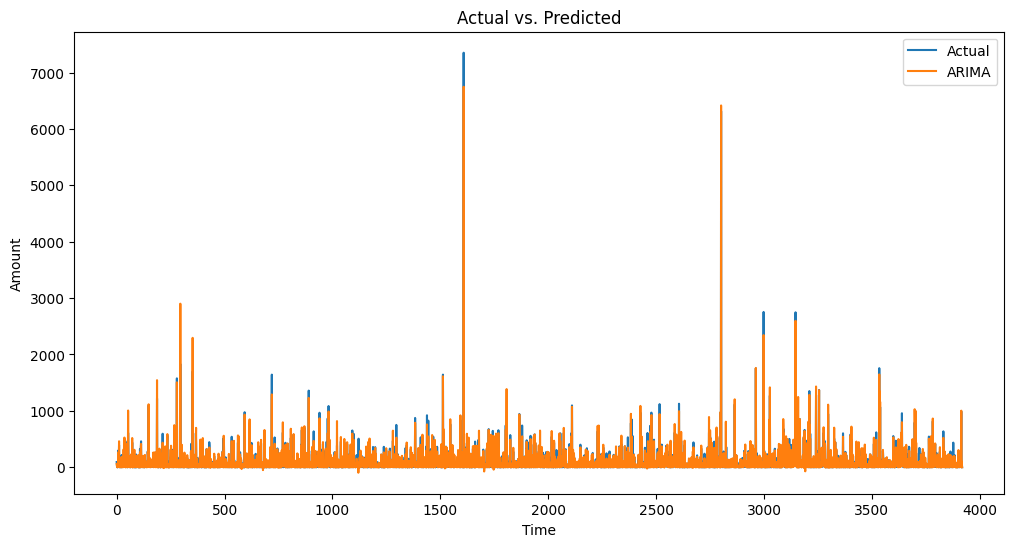

In [76]:
# plot the actual and predicted values from each model on the same graph
import matplotlib.pyplot as plt

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(final_df['amount'], label='Actual')
plt.plot(final_df['Forecast_ARIMA'], label='ARIMA')
# plt.plot(final_df['Forecast_SARIMA'], label='SARIMA')
# plt.plot(final_df['Forecast_Prophet'], label='Prophet')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.title('Actual vs. Predicted')
plt.show()

## Submission CSV

In [77]:
final_df.head()

,customer_id,month,category,amount,baseline_prediction,Forecast_ARIMA,Forecast_SARIMA,Forecast_Prophet
0,670546831,202207,ProductC,92.4612,31.701,56.24281945430218,56.24281945430218,163.15731511544655
1,644085688,202207,ProductA,41.8281,26.418,28.300026968879443,28.300026968879443,37.560198040415536
2,77457054,202207,ProductE,3.5225,0.6859,2.9852516543047405,2.9852516543047405,3.5841567026238295
3,32051085,202207,ProductE,0.8806,0.0,0.0,0.0,0.0
4,1668609463,202207,ProductA,59.44,26.418,39.464926151623686,39.464926151623686,57.511126286603


In [78]:
final_df.to_csv("prediction.csv")